In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

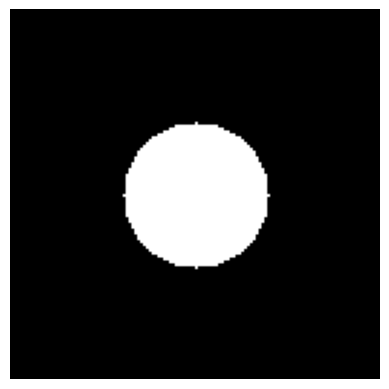

In [7]:
#Creating a black and white circle 
size=128
image=np.zeros((size,size),dtype=np.uint8)
center=(size/2,size/2)
radius=25
for y in range(size):
    for x in range(size):
        dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        if dist<=radius:
            image[y,x]=255
plt.imshow(image,cmap="gray")
plt.axis('off')
plt.show()
image_path='input_images/circle.jpg'
plt.imsave(image_path,image,cmap='gray')


In [8]:
# Create the image matrix (same as before)
size = 128
image = np.zeros((size, size), dtype=np.uint8)
center = (size / 2, size / 2)
radius = 25
for y in range(size):
    for x in range(size):
        dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        if dist <= radius:
            image[y, x] = 255
df = pd.DataFrame(image)
excel_path = 'CSV_files/circle_image_matrix_extracted.xlsx'
df.to_excel(excel_path, index=False, header=False)

In [13]:
def matrix(excel_path):
    df=pd.read_excel(excel_path,header=None)
    return df.to_numpy()

matrix('CSV_files/circle_image_matrix_extracted.xlsx')
def save_output_to_excel(output, output_path):
    df = pd.DataFrame(output)
    df.to_excel(output_path, index=False, header=False)

In [15]:
def conv(input_image,Kernel,Stride=1,Padding=1):
    Pad=np.pad(input_image,((Padding,Padding),(Padding,Padding)),mode='constant',constant_values=0)
    output_h=(Pad.shape[0]-Kernel.shape[0])//Stride+1
    output_w=(Pad.shape[1]-Kernel.shape[1])//Stride+1
    output=np.zeros((output_h,output_w))
    for i in range(0,output_h*Stride,Stride):
        for j in range(0,output_w*Stride,Stride):
            region=Pad[i:i+Kernel.shape[0],j:j+Kernel.shape[1]]
            output[i//Stride,j//Stride]=np.sum(region*Kernel)
    return output
k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(op, output_path)